In this exercise we'll take a look at some (simulated) proton-proton collision data.  The events chosen all have at least two reconstructed muons.  If you're not familiar, a muon is a heavy cousin of the electron; see [here](https://en.wikipedia.org/wiki/Muon) and [here](https://pdg.lbl.gov/2020/tables/rpp2020-sum-leptons.pdf) for some more information.  Some of these events contain (at least) a pair of real muons with opposite electric charge frmo the decay of a Z boson (see [here](https://en.wikipedia.org/wiki/W_and_Z_bosons),[here](https://pdg.lbl.gov/2020/listings/rpp2020-list-z-boson.pdf)).  Other events contain one real muon (could have positive or negative charge) from the decay of a W boson (more [here](https://pdg.lbl.gov/2020/listings/rpp2020-list-w-boson.pdf)) and one or more "fake" muons of either electric charge.  Here, fake means a lepton that is not from the decay of a W or Z boson.  These are typically from semi-leptonic decays of charm or bottom hadrons or decays in flight of kaons.

Take a look at the data in the file *total_withouttruth_mod.csv*.  Each row contains 8 values, separated by commas, containing the following information:

column 0: arbitrary index <br>
column 1: event number <br>
column 2: muon index in that event <br>
column 3: x-component of muon momentum <br>
column 4: y-component of muon momentum <br>
column 5: z-component of muon momentum <br>
column 6: muon energy <br>
column 7: muon electric charge <br>

Read in the data, organizing muons by event.  Plot a histogram of the invariant mass of all possible pairs of muons in each event, i.e. you may have more than one entry per event.  Play around and choose reasonable binning and comment on your observations.  Then, split the muon pairs into two samples, one where the muons have opposite electric charge and one where the muons have the same electric charge.  Plot histograms of the two populations and comment on your observations.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import numpy as np

import sys
from os import getcwd
sys.path.append(getcwd())
from convert_muon_data import convert_row

**Write a LorentzVector class. Your class should at least store the energy-momentum 4-vector and provide accessors to the components. It should also define addition and subtraction operators.  Then write a Particle class that stores a LorenzVector and the charge and define an addition operator.**

In [2]:
import getpass
path='/'.join(getcwd().split('/')[:-1])+'/tools/'
sys.path.append(path)
from LV import LorentzVector

class Particle(object):
    def __init__(self,q,lv,*args):
        if isinstance(lv,LorentzVector):
            self.lv = LorentzVector(lv.p4)
        elif len(args)==3:
            self.lv = LorentzVector(lv,*args)
        else:
            print('Invalid Particle construction')
        self.q = q
    def E(self):
        return self.lv.E()
    def px(self):
        return self.lv.px()
    def py(self):
        return self.lv.py()
    def pz(self):
        return self.lv.pz()
    def m(self):
        return self.lv.m()
    def __add__(self,other):
        return Particle(self.q+other.q,self.lv+other.lv) 
    def _rep(self):
        return 'q = %s, E = %s, px = %s, py = %s, pz = %s' % (self.q,self.E(),self.px(),self.py(),self.pz())
    __str__ = _rep
    __rep__ = _rep

**Read data from CSV file using csv.reader. Use the methods in convert_muon_data to parse each row and store the output in a list called <u>muons</u>.  The list should have one entry per event.  Each entry should be a list of Particle objects.  How many events are there?  How many muons are there?**

In [3]:
## read muon data from csv file into a list, with an entry (list) for each event containing np.array with the muon 4-vector components
muons = []
with open('total_withouttruth_mod.csv') as csv_file:
    csv_reader = csv.reader(csv_file,delimiter=',')
    for index,row in enumerate(csv_reader):
        if index==0: continue
        nrow,nevt,nmu,px,py,pz,E,charge=convert_row(row)
        if nevt == len(muons): muons.append([])
        muons[nevt].append(Particle(charge,E,px,py,pz))
        
csv_file.close()

print('There are %d events.' % (len(muons)))
print('There are %d muons.' % (sum(len(entry) for entry in muons)))

There are 83778 events.
There are 176392 muons.


**Make histograms of each component of the muon momentum, the muon energy, and the number of muons per event.  You should choose a reasonable binning and range and label the axes.  You may want to increase the width of the figure using the argument figsize=(x,y).**

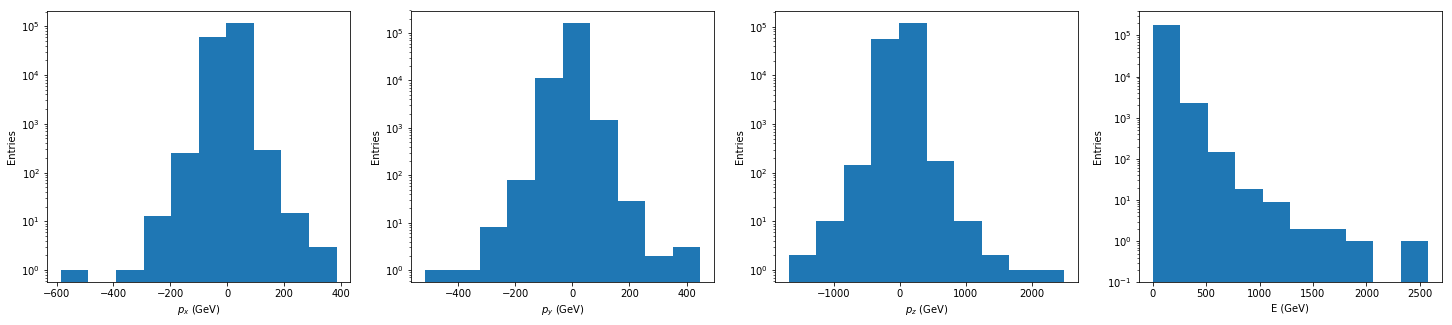

In [4]:
## create 4 subplots and make the figure wider
fig,axs = plt.subplots(1,4,figsize=(25,5))

## plot x-component of momentum for all muons
pxs=[x.px() for event in muons for x in event]
vals0,bins0,patches0=axs[0].hist(pxs,range=(np.min(pxs)*1.1,np.max(pxs)*1.1))
axs[0].set_xlabel('$p_x$ (GeV)')
axs[0].set_ylabel('Entries')
axs[0].set_yscale('log')

## plot y-component of momentum for all muons
pys=[x.py() for event in muons for x in event]
vals1,bins1,patches1=axs[1].hist(pys,range=(np.min(pys)*1.1,np.max(pys)*1.1))
axs[1].set_xlabel('$p_y$ (GeV)')
axs[1].set_ylabel('Entries')
axs[1].set_yscale('log')

## plot z-component of momentum for all muons
pzs=[x.pz() for event in muons for x in event]
vals2,bins2,patches2=axs[2].hist(pzs,range=(np.min(pzs)*1.1,np.max(pzs)*1.1))
axs[2].set_xlabel('$p_z$ (GeV)')
axs[2].set_ylabel('Entries')
axs[2].set_yscale('log')

## plot x-component of momentum for all muons
energies=[x.E() for event in muons for x in event]
vals3,bins3,patches3=axs[3].hist(energies,range=(0,np.max(energies)*1.1))
axs[3].set_xlabel('E (GeV)')
axs[3].set_ylabel('Entries')
axs[3].set_ylim(0.1,4*10**5)
axs[3].set_yscale('log')

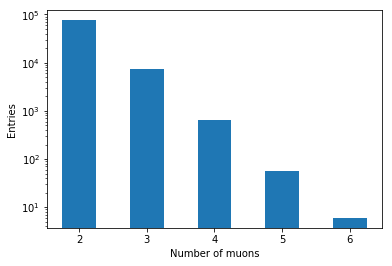

In [5]:
## plot number of muons per event
fig,ax=plt.subplots()

nmuons = [len(x) for x in muons]
vals,bins,patches=ax.hist(nmuons,bins=np.arange(np.amin(nmuons),np.amax(nmuons)+2)-0.5,rwidth=0.5)
ax.set_xlabel('Number of muons')
ax.set_ylabel('Entries')
ax.set_yscale('log')

**Create all possible pairs of muons for each event and store them in a list called <u>dimuons</u>.  Again, the list should have one entry per event.  Each entry should be a list of numpy arrays with each numpy array representing a 4-vector [px,py,pz,E].  How many dimuon pairs are there?  Make a histogram of each component of the momentum and the energy for each dimuon pair and a histogram of the number of dimuon pairs per event.**

In [6]:
## create all possible pairs of muons for each event
dimuons = []

for index,lom in enumerate(muons):
    if index == len(dimuons): dimuons.append([])
    for idx,i in enumerate(lom[:-1]):
        for idx2,j in enumerate(lom[idx+1:]):
            dimuons[index].append(i+j)

**Calculate the invariant mass for each dimuon pair.  Recall the relation $E^2 = p^2c^2 + m^2c^4$.  Here value are in a unit system where c=1.  Make a histogram of dimuon invariant mass.  Play around a bit to find a suitable binning.  What do you observe?**

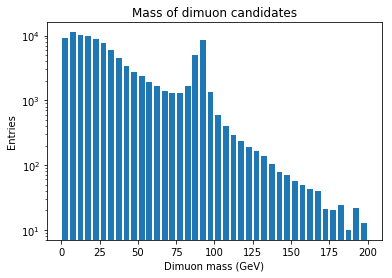

In [7]:
fig,ax=plt.subplots()
vals,bins,patches=ax.hist([x.m() for event in dimuons for x in event],bins=np.linspace(0,200,41),rwidth=0.75)
ax.set_xlabel('Dimuon mass (GeV)')
ax.set_ylabel('Entries')
ax.set_title('Mass of dimuon candidates')
ax.set_yscale('log')

**Do you see any peaks? If so around what mass value(s)? What are you observering?**

**Now separate the dimuon candidates into two samples, those with the same electric charge and those with opposite electric charge. How many pairs of each type do you get? Plot the invariant mass for dimuon pairs for the two samples.  What do you see?**

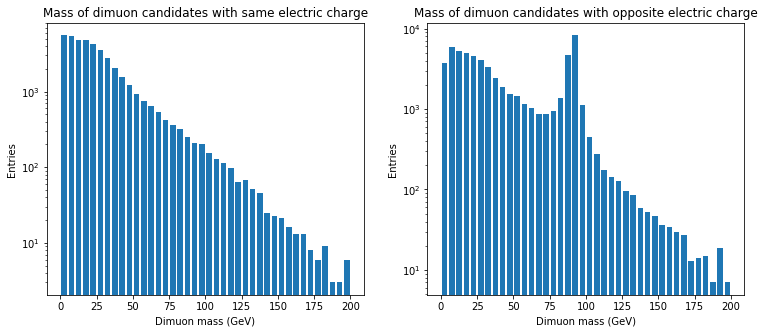

In [8]:
## make a histogram of the dimuon invariant mass zooming in on region below 200 GeV
fig,axs=plt.subplots(1,2,figsize=(12.5,5))
bins=np.linspace(0,200,41)

## dimuon pairs with same electric charge
vals0,bins0,patches0=axs[0].hist([x.m() for event in dimuons for x in event if x.q!=0],bins=bins,rwidth=0.75)
axs[0].set_xlabel('Dimuon mass (GeV)')
axs[0].set_ylabel('Entries')
axs[0].set_title('Mass of dimuon candidates with same electric charge')
axs[0].set_yscale('log')

## dimuon pairs with opposite electric charge
vals1,bins1,patches1=axs[1].hist([x.m() for event in dimuons for x in event if x.q==0],bins=bins,rwidth=0.75)
axs[1].set_xlabel('Dimuon mass (GeV)')
axs[1].set_ylabel('Entries')
axs[1].set_title('Mass of dimuon candidates with opposite electric charge')
axs[1].set_yscale('log')